# Project 1 Portfolio Analyzer Consumer Stocks VS. Tech Stocks

We will be projecting future returns of a portfolio comprised of five consumer stocks as well as a a portfolio comprised of 5 tech stocks over a 15 and 20 year period in order to evaluate the better long term buy. The asset allocation between between stocks and bonds will remain the same between both portfolios.


The Stocks we will be analyzing are 

# Consumer Stocks:             

* P&G
* Johnson and Johnson
* Walmart
* Kellogg
* Coca Cola

# Tech Stocks:

* Amazon 
* Meta
* Google
* Tesla
* NVIDIA



In [1]:
import pandas as pd
import yfinance as yf
from pathlib import Path

## Cost Basis: $50,000

In [2]:
all_stocks = pd.read_csv('Resources/newstocks.csv', header=1)
all_stocks= all_stocks.iloc[:, 0:12]
all_stocks = all_stocks.rename(columns={"Unnamed: 0":"Date"})
all_stocks = all_stocks.drop(all_stocks.index[0])
all_stocks = all_stocks.set_index("Date")
all_stocks = all_stocks.fillna(0)
all_stocks.head()

,AAPL,AMZN,GOOGL,JNJ,K,KO,MSFT,NVDA,PG,WMT,^GSPC
Date,,,,,,,,,,,
2005-01-03,0.961916,2.2260,5.072823,37.560463,25.440712,11.964916,18.813692,1.803077,33.111027,36.302994,1202.079956
2005-01-04,0.971795,2.1070,4.867367,37.441048,25.348959,11.797858,18.884058,1.718199,32.697063,36.214542,1188.050049
2005-01-05,0.980306,2.0885,4.842593,37.417137,25.503796,11.743134,18.841837,1.734257,33.039032,36.262180,1183.739990
2005-01-06,0.981066,2.0525,4.718468,37.524628,25.538202,11.841061,18.820728,1.717435,33.201012,36.779320,1187.890015
2005-01-07,1.052499,2.1160,4.851101,37.387280,25.354683,11.855467,18.764448,1.684554,33.548973,36.738506,1186.189941


In [3]:
tech_stocks = all_stocks.loc[:, ['AAPL','AMZN', 'GOOGL','MSFT','NVDA']]
tech_stocks.head()

,AAPL,AMZN,GOOGL,MSFT,NVDA
Date,,,,,
2005-01-03,0.961916,2.2260,5.072823,18.813692,1.803077
2005-01-04,0.971795,2.1070,4.867367,18.884058,1.718199
2005-01-05,0.980306,2.0885,4.842593,18.841837,1.734257
2005-01-06,0.981066,2.0525,4.718468,18.820728,1.717435
2005-01-07,1.052499,2.1160,4.851101,18.764448,1.684554


In [4]:
consumer_stocks = all_stocks.loc[:, ['JNJ','K','KO','PG','WMT']]
consumer_stocks.head()

,JNJ,K,KO,PG,WMT
Date,,,,,
2005-01-03,37.560463,25.440712,11.964916,33.111027,36.302994
2005-01-04,37.441048,25.348959,11.797858,32.697063,36.214542
2005-01-05,37.417137,25.503796,11.743134,33.039032,36.262180
2005-01-06,37.524628,25.538202,11.841061,33.201012,36.779320
2005-01-07,37.387280,25.354683,11.855467,33.548973,36.738506


In [5]:
sp_500 = all_stocks.loc[:, ['^GSPC']]
sp_500.head()

,^GSPC
Date,
2005-01-03,1202.079956
2005-01-04,1188.050049
2005-01-05,1183.739990
2005-01-06,1187.890015
2005-01-07,1186.189941


<Axes: title={'center': 'Share Price from 2005 to 2023'}, xlabel='Date', ylabel='Share Price'>

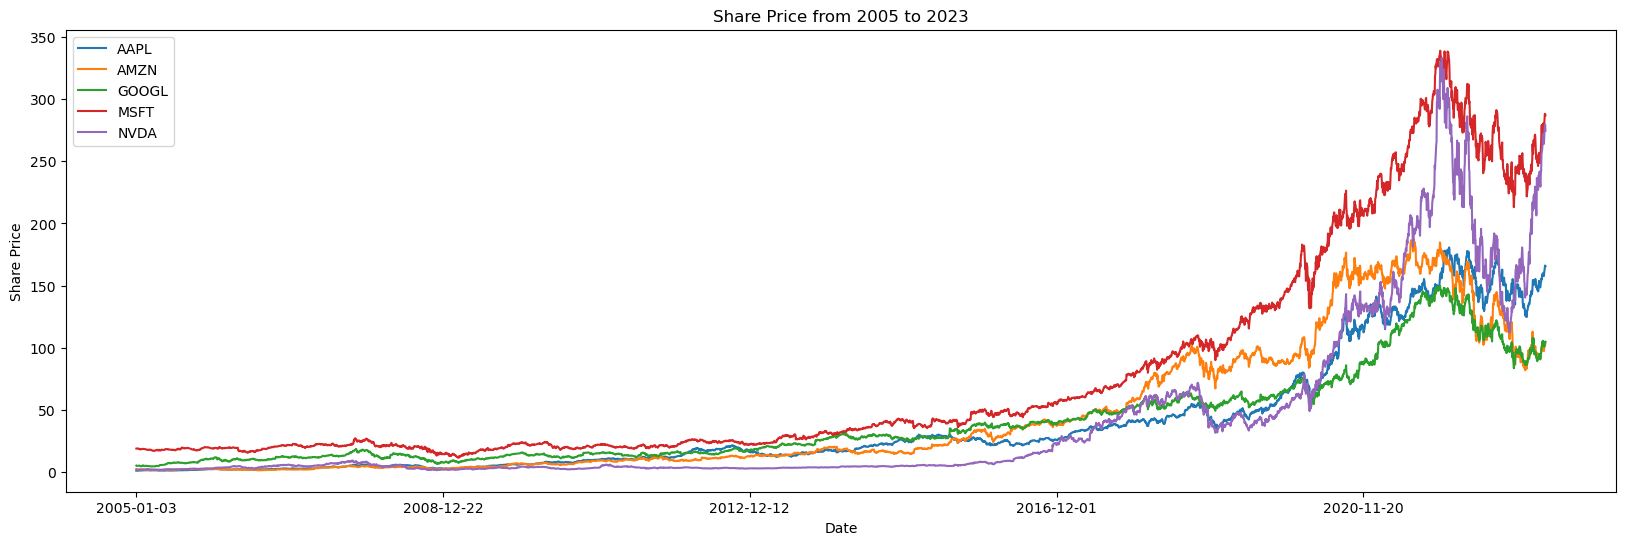

In [6]:
tech_stocks.plot(figsize=(20,6), title='Share Price from 2005 to 2023', legend=True, ylabel= "Share Price")

<Axes: title={'center': 'Share Price from 2005 to 2023'}, xlabel='Date', ylabel='Share Price'>

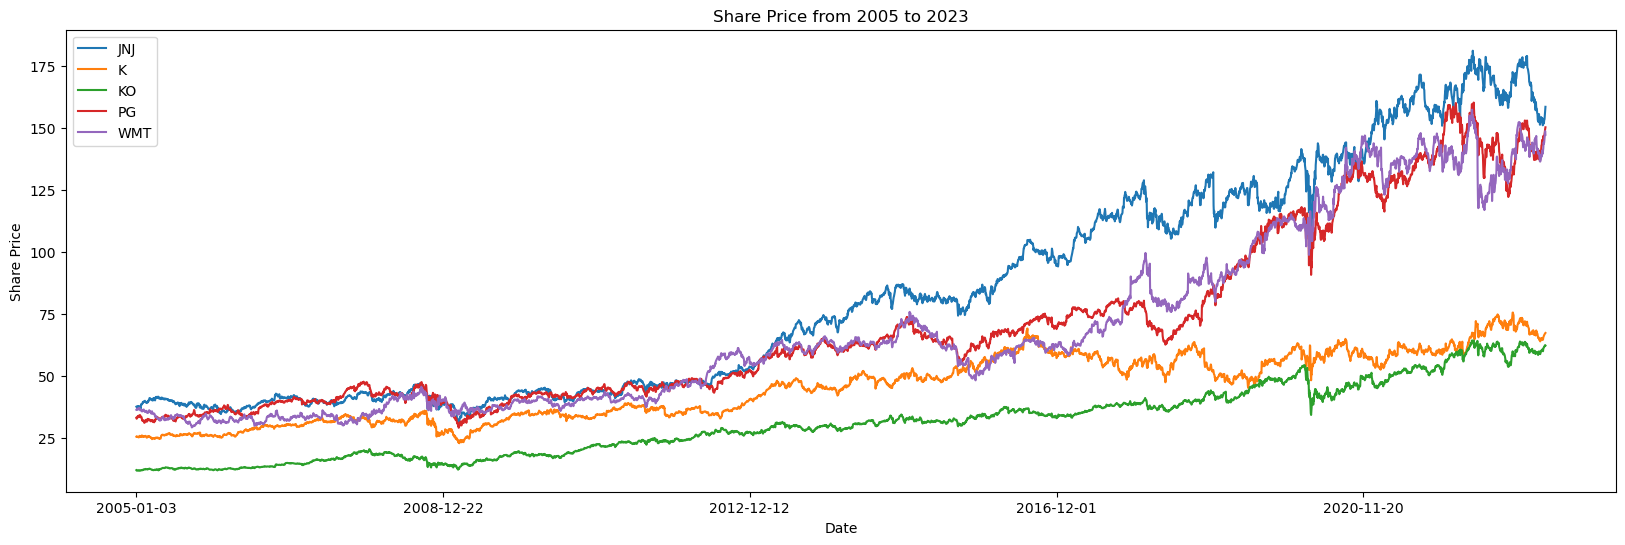

In [7]:
consumer_stocks.plot(figsize=(20,6), title='Share Price from 2005 to 2023', legend=True, ylabel= "Share Price")

<Axes: title={'center': 'Share Price from 2005 to 2023'}, xlabel='Date', ylabel='Share Price'>

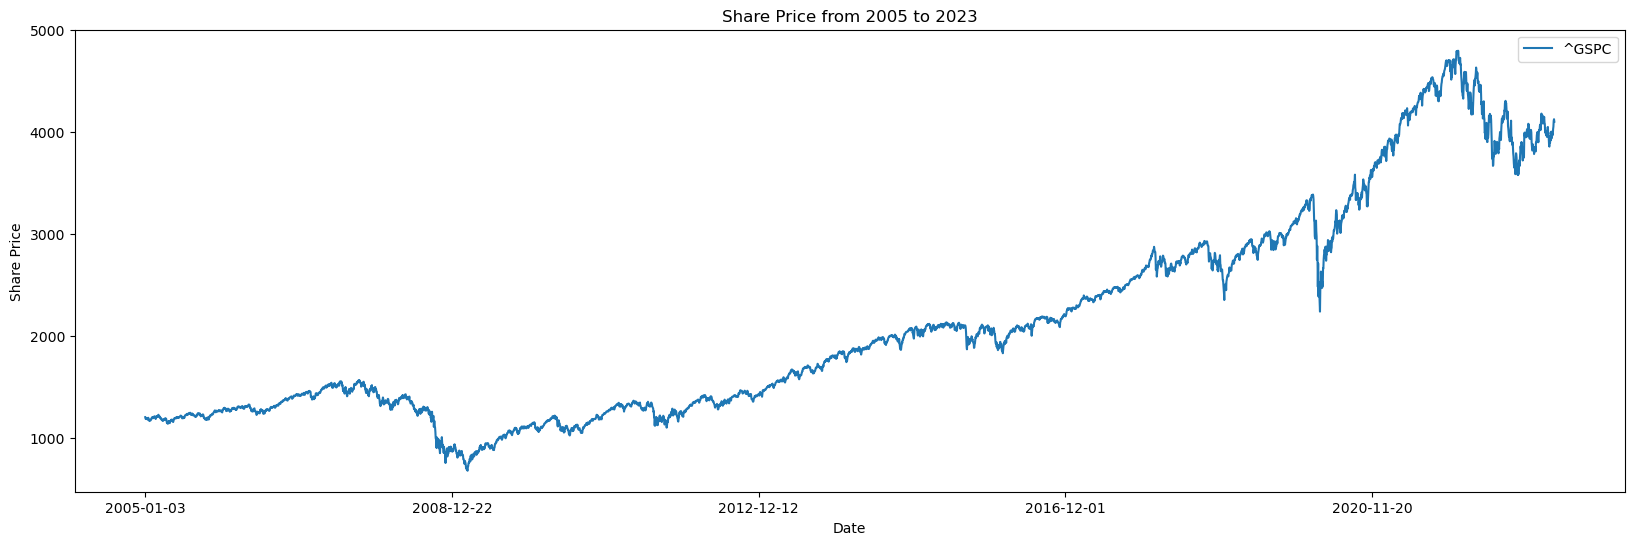

In [8]:
sp_500.plot(figsize=(20,6), title='Share Price from 2005 to 2023', legend=True, ylabel= "Share Price")

In [9]:
print(tech_stocks.head())
daily_returns_tech_stocks = tech_stocks.pct_change()
daily_returns_tech_stocks = daily_returns_tech_stocks.fillna(0)
print(daily_returns_tech_stocks.head())
daily_returns_18_year_tech = daily_returns_tech_stocks.loc["2005-01-03":"2023-04-03"]
daily_returns_18_year_tech.describe()

                AAPL    AMZN     GOOGL       MSFT      NVDA
Date                                                       
2005-01-03  0.961916  2.2260  5.072823  18.813692  1.803077
2005-01-04  0.971795  2.1070  4.867367  18.884058  1.718199
2005-01-05  0.980306  2.0885  4.842593  18.841837  1.734257
2005-01-06  0.981066  2.0525  4.718468  18.820728  1.717435
2005-01-07  1.052499  2.1160  4.851101  18.764448  1.684554
                AAPL      AMZN     GOOGL      MSFT      NVDA
Date                                                        
2005-01-03  0.000000  0.000000  0.000000  0.000000  0.000000
2005-01-04  0.010270 -0.053459 -0.040501  0.003740 -0.047074
2005-01-05  0.008758 -0.008780 -0.005090 -0.002236  0.009346
2005-01-06  0.000776 -0.017237 -0.025632 -0.001120 -0.009700
2005-01-07  0.072811  0.030938  0.028109 -0.002990 -0.019146


,AAPL,AMZN,GOOGL,MSFT,NVDA
count,4594.000000,4594.000000,4594.000000,4594.000000,4594.000000
mean,0.001338,0.001126,0.000839,0.000745,0.001566
std,0.020789,0.024333,0.019036,0.017398,0.030553
min,-0.179195,-0.218220,-0.116341,-0.147390,-0.307266
25%,-0.008574,-0.009993,-0.007899,-0.007243,-0.013555
50%,0.001079,0.000556,0.000698,0.000397,0.001437
75%,0.012025,0.012269,0.009858,0.008890,0.016391
max,0.139049,0.269497,0.199915,0.186046,0.298067


In [10]:
print(consumer_stocks.head())
daily_returns_consumer_stocks = consumer_stocks.pct_change()
daily_returns_consumer_stocks = daily_returns_consumer_stocks.fillna(0)
print(daily_returns_consumer_stocks.head())
daily_returns_18_year_consumer = daily_returns_consumer_stocks.loc["2005-01-03":"2023-04-03"]
daily_returns_18_year_consumer.describe()

                  JNJ          K         KO         PG        WMT
Date                                                             
2005-01-03  37.560463  25.440712  11.964916  33.111027  36.302994
2005-01-04  37.441048  25.348959  11.797858  32.697063  36.214542
2005-01-05  37.417137  25.503796  11.743134  33.039032  36.262180
2005-01-06  37.524628  25.538202  11.841061  33.201012  36.779320
2005-01-07  37.387280  25.354683  11.855467  33.548973  36.738506
                 JNJ         K        KO        PG       WMT
Date                                                        
2005-01-03  0.000000  0.000000  0.000000  0.000000  0.000000
2005-01-04 -0.003179 -0.003607 -0.013962 -0.012502 -0.002436
2005-01-05 -0.000639  0.006108 -0.004639  0.010459  0.001315
2005-01-06  0.002873  0.001349  0.008339  0.004903  0.014261
2005-01-07 -0.003660 -0.007186  0.001217  0.010480 -0.001110


,JNJ,K,KO,PG,WMT
count,4594.000000,4594.000000,4594.000000,4594.000000,4594.000000
mean,0.000370,0.000286,0.000428,0.000395,0.000389
std,0.010834,0.012199,0.011684,0.011543,0.012822
min,-0.100379,-0.109194,-0.096725,-0.087374,-0.113757
25%,-0.004549,-0.005373,-0.004815,-0.004793,-0.005704
50%,0.000256,0.000481,0.000495,0.000430,0.000471
75%,0.005667,0.006170,0.005894,0.005889,0.006429
max,0.122292,0.106458,0.138795,0.120090,0.117085


In [11]:
print(sp_500.head())
daily_returns_sp_500 = sp_500.pct_change()
daily_returns_sp_500 = daily_returns_sp_500.fillna(0)
print(daily_returns_sp_500.head())
daily_returns_18_year_sp_500 = daily_returns_sp_500.loc["2005-01-03":"2023-04-03"]
daily_returns_18_year_sp_500.describe()

                  ^GSPC
Date                   
2005-01-03  1202.079956
2005-01-04  1188.050049
2005-01-05  1183.739990
2005-01-06  1187.890015
2005-01-07  1186.189941
               ^GSPC
Date                
2005-01-03  0.000000
2005-01-04 -0.011671
2005-01-05 -0.003628
2005-01-06  0.003506
2005-01-07 -0.001431


,^GSPC
count,4594.000000
mean,0.000346
std,0.012412
min,-0.119841
25%,-0.004140
50%,0.000697
75%,0.005718
max,0.115800


<Axes: title={'center': 'Large Cap Tech Stocks Cumulative Returns from 2005-2023'}, xlabel='Date'>

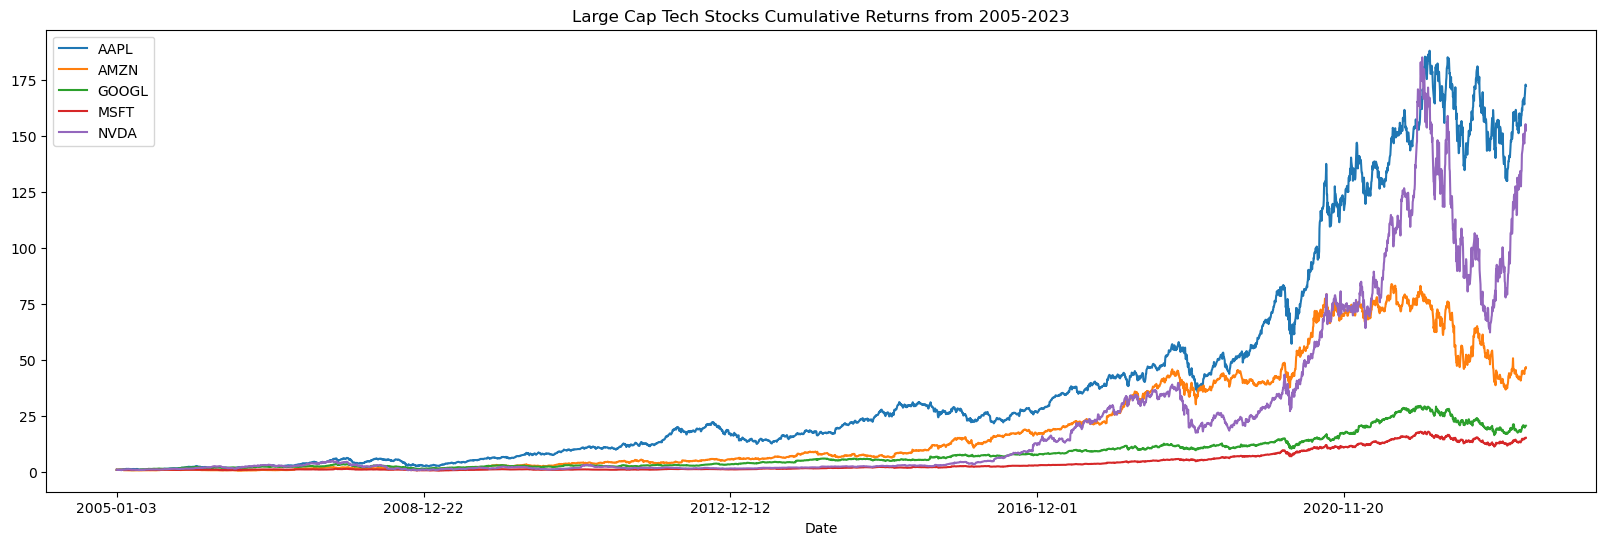

In [12]:
cumulative_returns_tech = (1 + daily_returns_tech_stocks).cumprod()
cumulative_returns_tech.plot(figsize=(20,6), title="Large Cap Tech Stocks Cumulative Returns from 2005-2023")

<Axes: title={'center': 'Large Cap Consumer Stocks Cumulative Returns from 2005-2023'}, xlabel='Date'>

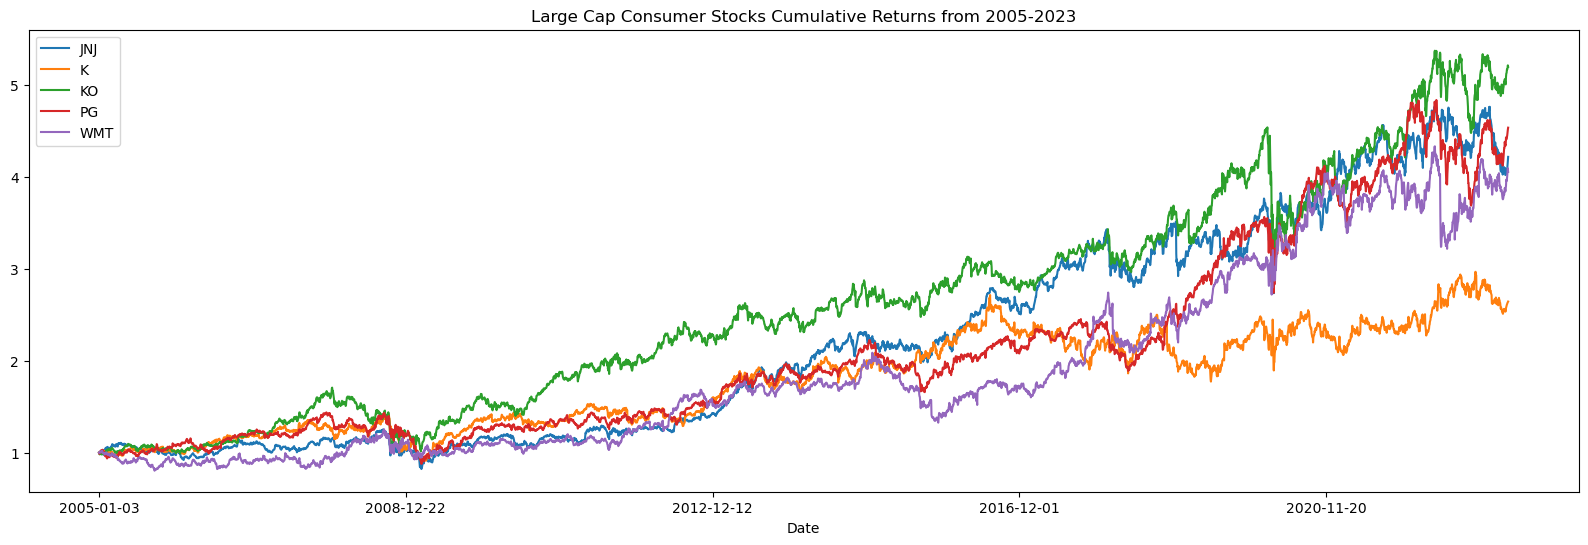

In [13]:
cumulative_returns_consumer = (1 + daily_returns_consumer_stocks).cumprod()
cumulative_returns_consumer.plot(figsize=(20,6), title="Large Cap Consumer Stocks Cumulative Returns from 2005-2023")

<Axes: title={'center': 'S&P 500 Cumulative Returns from 2005-2023'}, xlabel='Date'>

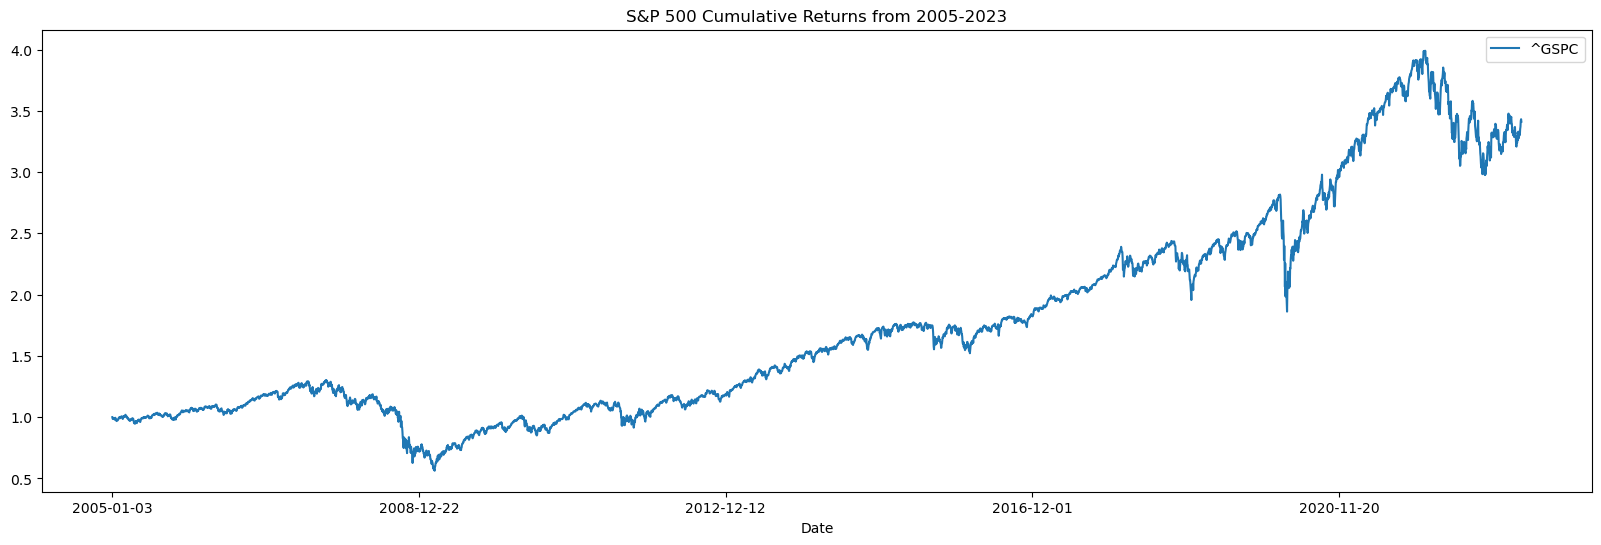

In [14]:
cumulative_returns_sp_500 = (1 + daily_returns_sp_500).cumprod()
cumulative_returns_sp_500.plot(figsize=(20,6), title="S&P 500 Cumulative Returns from 2005-2023")

## TASKS:
## Overlay Cumulative Return Plots
## Calculate Variance, Covariance Beta, Rolling Metrics
## Set Asset Allocations for both portfolios as of 12_12_2012
## Run Monte Carlo Simulations for both portfolios
## Summary Statistics
## Calculate Performance Metrics
## Analysis

## Portfolio C: Which 5 stocks out of these 10 would give the highest risk-adjusted return? (Highest Ratios)